In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
data = pd.read_csv(url)

print(data.head())
print(data.info())
print(data.describe())
print(data.isnull().sum())



   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes
None
           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000
Hours     0
Scores    0
dtype: int64


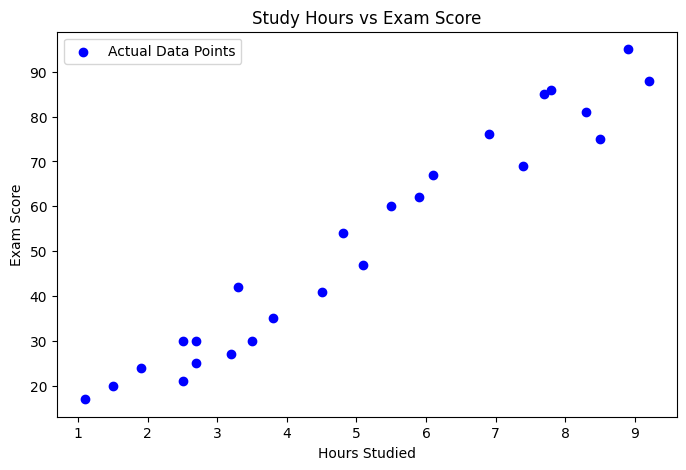

In [6]:
plt.figure(figsize=(8, 5))
plt.scatter(data['Hours'], data['Scores'], color='blue', label='Actual Data Points')
plt.title('Study Hours vs Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend()
plt.show()

In [7]:
X = data[['Hours']]
y = data['Scores']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [9]:
model=LinearRegression()
model.fit(X_train,y_train)

print("Slope (m):", model.coef_[0])
print("Intercept (b):", model.intercept_)

Slope (m): 9.682078154455697
Intercept (b): 2.826892353899737


In [14]:
y_pred = model.predict(X_test)

comparison_df = pd.DataFrame({
    'Hours Studied': X_test['Hours'],
    'Actual Score': y_test,
    'Predicted Score': y_pred
})
print(comparison_df)

    Hours Studied  Actual Score  Predicted Score
8             8.3            81        83.188141
16            2.5            30        27.032088
0             2.5            21        27.032088
23            6.9            76        69.633232
11            5.9            62        59.951153


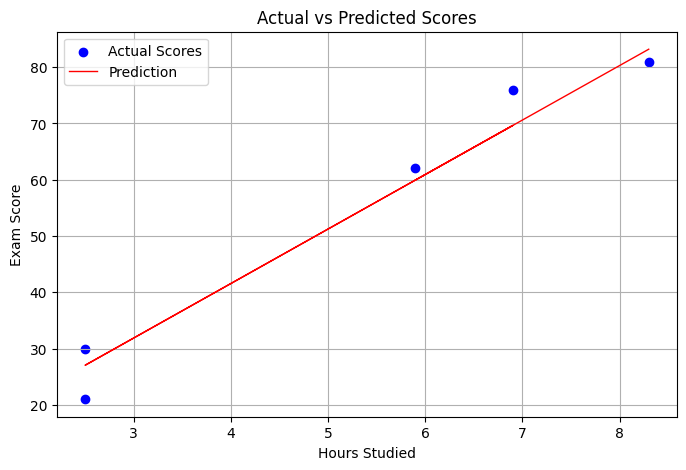

In [16]:
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, color='blue', label='Actual Scores')       # Blue dots = true values
plt.plot(X_test, y_pred, color='red', linewidth=1, label='Prediction') # Red line = predicted values
plt.title('Actual vs Predicted Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
hours = [[9.25]]
predicted_score = model.predict(hours)
print(f"Predicted Score for studying {hours[0][0]} hours: {predicted_score[0]:.2f}")

Predicted Score for studying 9.25 hours: 92.39


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [21]:
import numpy as np
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Step 2: R² Score
r2 = r2_score(y_test, y_pred)

# Step 3: Print the results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 18.94
Root Mean Squared Error (RMSE): 4.35
R² Score: 0.97
